<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/over_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Overfitting II


Para mitigar el *overfitting*, podemos aplicar varias técnicas, entre ellas:

- **Recolectar más datos**: Ayuda al modelo a generalizar mejor y reducir el ajuste al ruido.
- **Regularización**: Introducir una penalización a la complejidad del modelo mediante técnicas de regularización.
- **Modelos ensamblados**: Combinar varios modelos para mejorar la robustez y precisión.
- **Validación cruzada**: Evaluar el modelo en múltiples particiones para obtener una mejor estimación de su desempeño.
- **Optimización de hiperparámetros**: Ajustar parámetros con técnicas como *grid search* para encontrar el equilibrio óptimo entre ajuste y generalización.
- **Reducción de la dimensión**: Simplificar los datos para disminuir la complejidad del modelo.
- **Selección de atributos**: Elegir solo las características más relevantes para mejorar la generalización.

A continuación, exploraremos ejemplos de algunos de estos métodos para reducir el sobreajuste.

## Validación Cruzada

La **validación cruzada** consiste en dividir el conjunto de datos en $k$ particiones (o *pliegues*), típicamente entre 5 y 10.

En cada una de las $k$ iteraciones, se selecciona un pliegue diferente como conjunto de *evaluación*, mientras que los otros $k-1$ pliegues se combinan para formar el conjunto de *entrenamiento*. Esto implica que, en cada iteración, $(k-1) / k$ de los datos se utiliza para *entrenamiento* y $1 / k$ para *evaluación*.

Cada iteración genera una estimación del rendimiento del modelo, proporcionando una medida de su capacidad de *generalización*. Al finalizar, cada ejemplo ha sido utilizado una vez para *evaluación* y $k-1$ veces para *entrenamiento*, permitiendo calcular la media y desviación estándar de la precisión, ofreciendo así una evaluación robusta del modelo.


<img src="https://miro.medium.com/v2/resize:fit:940/1*lOZqYqwmuW1lg6fitwqXxA.png" width = "700" align="center"/>



Veamos un ejemplo en python, ocupando el conjunto de datos **make_classification**.

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import random

# Configuración de semilla y gráficos
random.seed(1982)
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (12, 4)})

# Generación de datos simulados
X, y = make_classification(n_samples=10000, n_features=100, n_informative=3, n_classes=2, random_state=1982)

# División de datos en entrenamiento y evaluación
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, random_state=1982)

# Definición del modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Configuración de validación cruzada con 20 pliegues estratificados
skf = StratifiedKFold(n_splits=20)
precision_scores = []

# Validación cruzada
for k, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Entrenamiento y evaluación en el pliegue actual
    model.fit(X_train_fold, y_train_fold)
    score = model.score(X_test_fold, y_test_fold)
    precision_scores.append(score)
    
    # Imprimir resultados del pliegue
    print(f'Pliegue: {k+1}, Distribución de Clases: {np.bincount(y_train_fold)}, Precisión: {score:.3f}')

# Resultados generales
print("\nPrecisión media de la validación cruzada:", np.mean(precision_scores))


Pliegue: 1, Distribución de Clases: [3111 3064], Precisión: 0.929
Pliegue: 2, Distribución de Clases: [3111 3064], Precisión: 0.938
Pliegue: 3, Distribución de Clases: [3111 3064], Precisión: 0.923
Pliegue: 4, Distribución de Clases: [3111 3064], Precisión: 0.945
Pliegue: 5, Distribución de Clases: [3111 3064], Precisión: 0.932
Pliegue: 6, Distribución de Clases: [3111 3064], Precisión: 0.902
Pliegue: 7, Distribución de Clases: [3111 3064], Precisión: 0.920
Pliegue: 8, Distribución de Clases: [3111 3064], Precisión: 0.945
Pliegue: 9, Distribución de Clases: [3111 3064], Precisión: 0.945
Pliegue: 10, Distribución de Clases: [3111 3064], Precisión: 0.926
Pliegue: 11, Distribución de Clases: [3111 3064], Precisión: 0.935
Pliegue: 12, Distribución de Clases: [3111 3064], Precisión: 0.917
Pliegue: 13, Distribución de Clases: [3111 3064], Precisión: 0.908
Pliegue: 14, Distribución de Clases: [3111 3064], Precisión: 0.902
Pliegue: 15, Distribución de Clases: [3111 3064], Precisión: 0.932
Plie

En este ejemplo, utilizamos el iterador `StratifiedKFold` de Scikit-learn, que realiza validación cruzada estratificada. Esto significa que cada *pliegue* mantiene la proporción de clases del conjunto de datos original, lo que suele proporcionar estimaciones más precisas del sesgo y la varianza del modelo.

Alternativamente, podríamos utilizar `cross_val_score`, que facilita la obtención directa de las puntuaciones de precisión para cada *pliegue* sin necesidad de iterar manualmente.



In [2]:
# Librerías necesarias
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Generación de datos simulados
X, y = make_classification(n_samples=10000, n_features=100, n_informative=3, n_classes=2, random_state=1982)

# Definición del modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Configuración de validación cruzada con 20 pliegues estratificados
skf = StratifiedKFold(n_splits=20)

# Uso de cross_val_score para obtener precisión en cada pliegue
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Resultados
for i, score in enumerate(scores, 1):
    print(f'Pliegue {i}: Precisión = {score:.3f}')

print(f'\nPrecisión media de la validación cruzada: {np.mean(scores):.3f}')
print(f'Desviación estándar de la precisión: {np.std(scores):.3f}')

Pliegue 1: Precisión = 0.928
Pliegue 2: Precisión = 0.914
Pliegue 3: Precisión = 0.916
Pliegue 4: Precisión = 0.938
Pliegue 5: Precisión = 0.924
Pliegue 6: Precisión = 0.938
Pliegue 7: Precisión = 0.924
Pliegue 8: Precisión = 0.938
Pliegue 9: Precisión = 0.936
Pliegue 10: Precisión = 0.908
Pliegue 11: Precisión = 0.936
Pliegue 12: Precisión = 0.938
Pliegue 13: Precisión = 0.934
Pliegue 14: Precisión = 0.922
Pliegue 15: Precisión = 0.930
Pliegue 16: Precisión = 0.928
Pliegue 17: Precisión = 0.924
Pliegue 18: Precisión = 0.926
Pliegue 19: Precisión = 0.936
Pliegue 20: Precisión = 0.920

Precisión media de la validación cruzada: 0.928
Desviación estándar de la precisión: 0.009



**Explicación**:
- **`cross_val_score`**: Realiza la validación cruzada de forma compacta, devolviendo la precisión de cada *pliegue* en una lista.
- **Resultados**: Imprimimos la precisión de cada *pliegue*, la precisión media y la desviación estándar, proporcionando una visión general de la consistencia del modelo en los diferentes pliegues.

Este enfoque es más sencillo y evita la necesidad de un bucle explícito para el cálculo de cada *pliegue*.

## Más Datos y Curvas de Aprendizaje

- A veces, reducir el *overfitting* puede lograrse simplemente con más datos. ¡Dame más datos y te predeciré el futuro!
- Sin embargo, en la práctica, conseguir datos adicionales no suele ser tan sencillo.
- Una técnica útil para entender y reducir el *overfitting* son las **curvas de aprendizaje**, que muestran cómo varía la precisión en función del tamaño del conjunto de datos de entrenamiento.


<img src="https://miro.medium.com/v2/resize:fit:936/1*xwtSpR_zg7j7zusa4IDHNQ.png" width = "500" align="center"/>




Para graficar las curvas de aprendizaje es necesario ocupar el comando de sklearn llamado `learning_curve`.

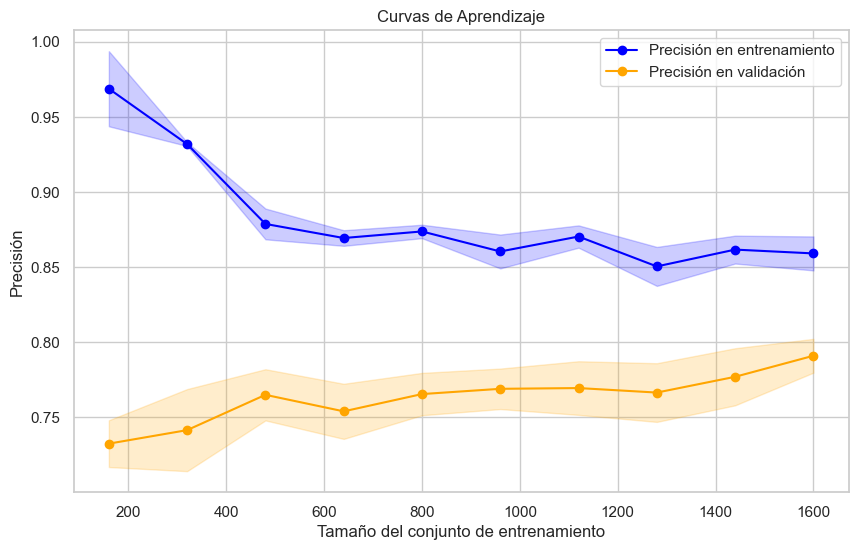

In [3]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Configuración de estilo de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Generar un conjunto de datos simulado
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15, random_state=42)

# Definir el modelo de clasificación
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calcular media y desviación estándar de las precisiones en cada tamaño de entrenamiento
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Precisión en entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Precisión en validación")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")

# Configurar etiquetas y título del gráfico
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curvas de Aprendizaje")
plt.legend(loc="best")
plt.show()


## Grid Search

La optimización de parámetros es clave para mejorar el rendimiento de los modelos de Machine Learning y reducir el *overfitting*. Una herramienta común para ello es **grid search**, que busca de manera exhaustiva la mejor combinación de parámetros para maximizar la precisión del modelo.

*Grid search* prueba todas las combinaciones especificadas de valores de parámetros y selecciona la que ofrece el mayor rendimiento, evaluando cada opción mediante validación cruzada.



<img src="https://neurosnap.ai/assets/blog/gridsearch.webp" width = "600" align="center"/>




In [5]:
# Importar librerías necesarias
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base
model = DecisionTreeClassifier()

# Rango de parámetros para Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],                    # Función de evaluación para la división de nodos
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]  # Profundidades posibles
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(x_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo = gs.best_estimator_
mejor_modelo.fit(x_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo.score(x_eval, y_eval)))

Mejor precisión en validación cruzada: 0.9335384615384615
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 6}
Precisión en el conjunto de evaluación: 0.938


En este ejemplo, utilizamos `GridSearchCV` para realizar una búsqueda exhaustiva de combinaciones de los parámetros `criterion` y `max_depth`, junto con validación cruzada. Este proceso ajusta el modelo iterando sobre todas las combinaciones de valores de estos parámetros.

Al finalizar, imprimimos la mejor precisión obtenida en validación cruzada y los valores óptimos de los parámetros correspondientes. Luego, entrenamos el modelo óptimo en los datos de evaluación y verificamos su rendimiento.

La precisión obtenida en los datos de evaluación es prácticamente idéntica a la de *Grid Search*, lo que sugiere que el modelo *generaliza* bien en datos nuevos.

## Reducción de Dimensionalidad

La **reducción de dimensionalidad** es una técnica útil para combatir el *overfitting* al simplificar el modelo eliminando características irrelevantes o redundantes. Esto reduce la complejidad del modelo y ayuda a que generalice mejor en datos nuevos.

Una técnica común para la reducción de dimensionalidad es **Análisis de Componentes Principales (PCA)**, que transforma los datos originales en un nuevo espacio de menor dimensión manteniendo la mayor varianza posible. A continuación, se muestra un ejemplo en Python usando PCA para reducir la dimensionalidad de un conjunto de datos y luego entrenar un modelo de clasificación.



In [6]:
# Importar librerías necesarias
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generar datos simulados con 20 características
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# Dividir el conjunto de datos en entrenamiento y evaluación
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar PCA para reducir las características a 10 componentes principales
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_eval_pca = pca.transform(x_eval)

# Definir y entrenar el modelo en los datos reducidos
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(x_train_pca, y_train)

# Evaluar el modelo en los datos de evaluación
y_pred = model.predict(x_eval_pca)
accuracy = accuracy_score(y_eval, y_pred)

print("Precisión con reducción de dimensionalidad (PCA): {:.3f}".format(accuracy))

Precisión con reducción de dimensionalidad (PCA): 0.827


**Explicación**

1. **Generación de Datos**: Se crean datos simulados con 20 características, de las cuales 10 son informativas y 10 redundantes, lo que es común en conjuntos de datos reales.
2. **Reducción de Dimensionalidad**: Se aplica PCA para reducir las 20 características originales a 10 componentes principales, manteniendo la información más relevante.
3. **Entrenamiento del Modelo**: Se entrena un `DecisionTreeClassifier` en los datos reducidos de entrenamiento.
4. **Evaluación**: Se calcula la precisión del modelo en los datos de evaluación transformados, observando cómo la reducción de dimensionalidad impacta el rendimiento.



## Referencias

1. [K-Fold Cross Validation](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)
2. [Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)
3. [Feature selection for supervised models using SelectKBest](https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)
